# Linear Regression
선형회귀

#### 08_23  시작

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

from IPython.display import Image

### '추세' 구하기 
데이터 추세,  예측

In [8]:
# 가령 다음과 같은 경우
df = pd.DataFrame([[1, 10], [2, 20], [3, 30], [4, 40], [5, 50]], columns=['x', 'y'])
df

# x 값이 6 인 경우 y 값은?   (y 예측값? 추세는?)
# 아래와 같은 경우 직관적으로 쉽게 예측 가능
# "x 가 6 일때 y 값은 60"

,x,y
0,1,10
1,2,20
2,3,30
3,4,40
4,5,50


In [11]:
# 그러나, 위와 같이 데이터가 오차가 있는 실제 상황의 경우는?
df = pd.DataFrame([[1, 6], [2, 18], [3, 33], [4, 42], [5, 100]], columns=['x', 'y'])
df



,x,y
0,1,6
1,2,18
2,3,33
3,4,42
4,5,100


In [10]:
# 이때도 다음과 같으 예측을 할려면???
# "x 가 6 일때 y 값은 60"

# 이러려면 '추세' 가 필요하다

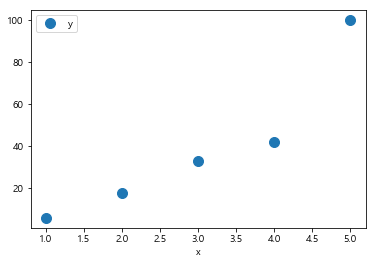

In [35]:
df.set_index('x').plot(style=".", markersize=20)

# 아래 그래프를 점 사이를 관통하는 '추세선'을 그릴수 있나요?

#### 08_23  00:01:39

In [36]:
# Y = AX + B    

# 가령.. Y = 3 * X     (일단 B =0 이라고 가정하고 해보자)

data_X = [1, 2, 3, 4, 5]
data_Y = [3, 6, 9, 12, 15]


# 과연 위와 같은 데이터가 주어졌을때
# 올바은 A 값은 무엇인가?   ★


# ※ 물론 실제 데이터라면 X 하나가 아니라, X1, X2, X3 ... 와 같이 여러 X 값들이 있을수 있다.

#### 바람직한 추세란?  우리가 원하는 목적은? COST 란?

In [3]:
# 올바른 추세 == "추세선과 점들과의 거리의 제곱의 합" 이 최소가 되는 A   <-- 바로 이 A값을 찾는 것이 목적!
#             ---------------------------
#             = COST


# 이때 "추세선과 점들과의 거리의 제곱의 합"   을  'COST' 라 한다. 즉 COSE 가 최소가 되는 A 값을 찾아야 한다

# A = 1 일때  COST 값 계산
# A = 2 일때  COST 값 계산
# A = 3 일때  COST 값 계산
#...
# 이와 같이 계산해 가면서
# COST 가 최소인 A 값을 찾게 된다


#### 일단 COST 를 계산하는 함수를 만들어 보자

In [37]:
def calculate_cost(data_X, data_Y, A):
    # COST => 점들과의 거리의 제곱의 합
    cost = 0
    
    for index in range(len(data_X)):
        x = data_X[index]
        y = data_Y[index]   # <-- y 는 실제 데이터
                            #  ↓-- x * A 는 예측값
        cost = cost + (y - x * A) ** 2     # 
        #              ----------------
        #              ↑ (실제데이터 - 예측값) 의 제곱을 COST 에 누적
    
    return cost

In [40]:
# 만약 A 값에 3을 넣으면 정확하게 0 이 나와야 정상.  즉 COST 최소값!  (100% 정확히 예측 일치)

calculate_cost(data_X, data_Y, 3)

0

In [42]:
# A 값을 변화 시켜가며 COST 결과값(오차율)들을 확인해보자

calculate_cost(data_X, data_Y, 1),  # 220
calculate_cost(data_X, data_Y, 2),  # 55
calculate_cost(data_X, data_Y, 3),  # 0
calculate_cost(data_X, data_Y, 4),  # 55
calculate_cost(data_X, data_Y, 5)  # 220

220

#### 위 A값에 따른 COST 데이터를 그래프로 그려보자

In [43]:
x = np.arange(0, 10, 0.01)
y = [calculate_cost(data_X, data_Y, i) for i in x]

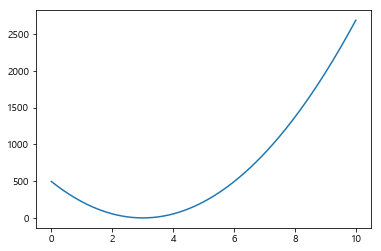

In [45]:
plt.plot(x, y)

In [47]:
# 위 그래프를 보면  금방  x축 3 지점이 최소값이 됨을 알수는 있다.
# 그러나, 지금의 경우 x 값이 하나이기때문에 A 값이 하나라 금방 알수 있는 거고

# x 값이 여러개 x1, x2, x3 ... 인 경우는?
# 가령   Y = A1xX1 + A2xX2 + A3xX3 .... + B   <--- 여기서는 A1, A2, A3  심지어 B 까지.. 알아내야 하니 복잡하다.

### Linear Regression 

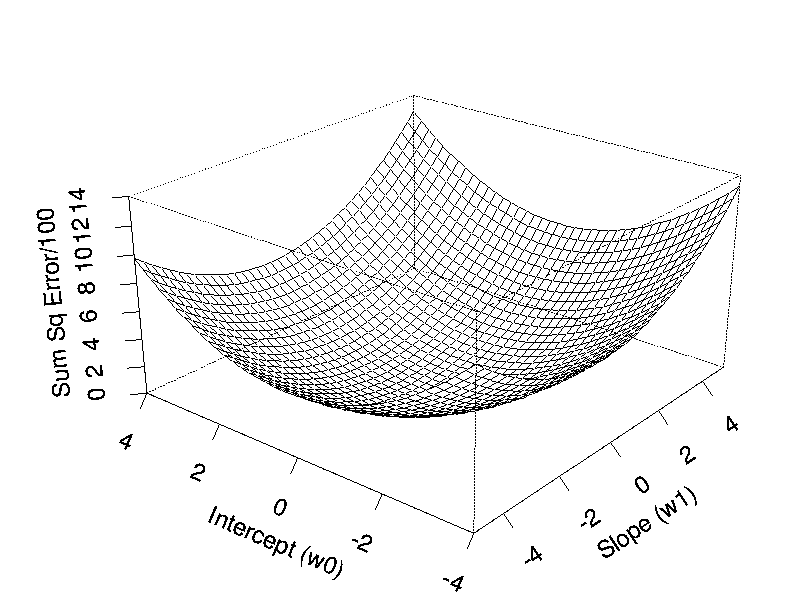

In [49]:
# 실제로 최소값을 어케 찾나?
# 모든 점에 대해서 다 조사해야 하나?  <-- 불가능!

# 그래서, '모든 점' 들을 다 찍어 보는게 아니라, 특정 점으로 부터 시작하여 계산해 나감  --> 이것이 Linear Refression

# 위 그래프에서 '기울기' 값으로 
# 가령 x = 9 위치부터 시작한다면 기울기가 0으로 수렴하는 방향으로 조금씩 값을 이동시키면서  (좌<-우)
# 기울기 값이 최소값이 되는 지점을 찾아감

# 기울기 값이 선형으로 점진적인 값의 변화... --> Linear Regression

# 마찬가지로  x 값이 3 보다 작은 쪽에서 시작했어도, 기울기 값이 0으로 수렴하는 방향으로 조금씩 이동  (좌->우)
# 

# 이러한 일을 수행하는 알고리즘들 많다
# 참고로 이 경우는 Gradient Decent 알고리즘이다.

# x 값이 여러개 이어도 이 알고리즘들이 적용된다. ★ 

# 3차원 일 경우는 마치 밥그릇 같은 모양이 만들어질거다

Image('./images/linear_regression1.gif')  # 예

In [50]:
# 이러한 것들을 다루는(머신러닝, 통계모델)모듈들 굉장히 많다

# scipy  statsmodel  scikit-learn tensorflow 

#### 08_23  14:53

In [5]:
from scipy import stats

In [52]:
data_X, data_Y         # Y = 3X

([1, 2, 3, 4, 5], [3, 6, 9, 12, 15])

In [53]:
stats.linregress(data_X, data_Y)

# 기울기 slope=3.0,  절편 intercept=0.0

# 즉 '모든 점' 들을 다 찍어 보는게 아니라, 특정 점으로 부터 시작하여 계산해 나감

LinregressResult(slope=3.0, intercept=0.0, rvalue=1.0, pvalue=1.2004217548761408e-30, stderr=0.0)

In [54]:
stats.linregress(data_X, [y + 2 for y in data_Y])

LinregressResult(slope=3.0, intercept=2.0, rvalue=1.0, pvalue=1.2004217548761408e-30, stderr=0.0)

In [3]:
# 데이터에 오차를 줘보겠습니다

data_X = [1, 2, 3, 4, 5]
data_Y = [9, 22, 35, 38, 50]  # y = 10x    <--- 기울기 10 !

# 과연 추세는 어케 나올까?  Linear regreasion 의 결과는

In [6]:
s, i, r, p, e = stats.linregress(data_X, data_Y)

# 점, 추세선

In [59]:
s, i, r, p, e

# s 값(기울기)이 거의 10 에 가깞게 나옴

(9.8,
 1.3999999999999986,
 0.9845393456089396,
 0.0023023212738423997,
 1.0066445913694342)

In [61]:
# 그러면 
# X = 6 인 경우는? 
6 * s + i      # <-- 예측값이 나온다!

60.2

### TODO: 그래프 그리기
점들과 추세선 그려보기

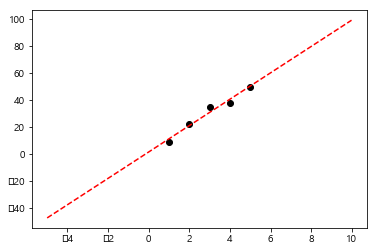

In [65]:
# 예    

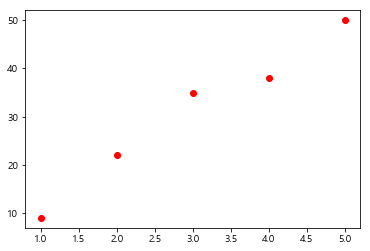

In [11]:
# 검정색 동그라미 점으로 점찍기

plt.plot(
    data_X, data_Y, "ro"
)

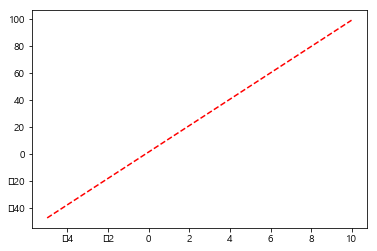

In [12]:
x = np.arange(-5, 10, 0.01)
y = x * s + i

plt.plot(x, y, "r--")

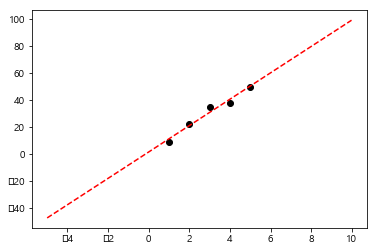

In [64]:
x = np.arange(-5, 10, 0.01)
y = x * s + i

plt.plot(
    data_X, data_Y, "ko",
    x, y, "r--"
)

In [66]:
# 내부적으로 이해하는 것도 중요하지만
# 기존의 라이브러리 사용해서  직접 해보는 것 (프로그래밍적으로) 도 좋습니다

## 추천사이트
- https://scikit-learn.org

In [68]:
# 다양한 문제들에대한 예제 풍부 : Classification, Regression, Clustering...

# 예제 코드가 짧고 다양

# 주식, 유저 구매 내역 데이터 등... 다룸

#### 08_23  00:24:39